# Predicting Patients' Lengths of Stay in Hospital

In this project, we will build models to predict how long (days) patients will stay in a hospital using their different medical test results. This is a typical **regression** project.

## Loading the data

The data has 28 rows as belows. You can access the original data at https://microsoft.github.io/r-server-hospital-length-of-stay/input_data.html. **I have made some minor changes to the data to use in this example, so please use the D2L version**.

<table class="table table-striped table-condensed">
<tbody><tr><th>Index</th><th>Data Field</th><th>Type</th><th>Description</th></tr>
<tr><td>1</td><td>	eid</td><td>	Integer</td><td>	Unique Id of the hospital admission</td></tr>
<tr><td>2</td><td>	vdate</td><td>	String</td><td>	Visit date</td></tr>
<tr><td>3</td><td>	rcount</td><td>	Integer </td><td>	Number of readmissions within last 180 days</td></tr>
<tr><td>4</td><td>	gender</td><td>	String</td><td>	Gender of the patient - M or F</td></tr>
<tr><td>5</td><td>	dialysisrenalendstage </td><td>String</td><td>	Flag for renal disease during encounter</td></tr>
<tr><td>6</td><td>	asthma </td><td>String</td><td>	Flag for asthma during encounter</td></tr>
<tr><td>7</td><td>	irondef </td><td>String</td><td>	Flag for iron deficiency during encounter</td></tr>
<tr><td>8</td><td>	pneum  </td><td>String</td><td>	Flag for pneumonia during encounter</td></tr>
<tr><td>9</td><td>	substancedependence </td><td>String</td><td>	Flag for substance dependence during encounter</td></tr>
<tr><td>10</td><td>	psychologicaldisordermajor </td><td>String</td><td>	Flag for major psychological disorder during encounter</td></tr>
<tr><td>11</td><td>	depress </td><td>String</td><td>	Flag for depression during encounter</td></tr>
<tr><td>12</td><td>	psychother </td><td> String</td><td>	Flag for other psychological disorder during encounter</td></tr>
<tr><td>13</td><td>	fibrosisandother </td><td> String</td><td>	Flag for fibrosis during encounter</td></tr>
<tr><td>14</td><td>	malnutrition </td><td> String</td><td>	Flag for malnutrituion during encounter</td></tr>
<tr><td>15</td><td>	hemo </td><td> String</td><td>	Flag for blood disorder during encounter </td></tr>
<tr><td>16</td><td>	hematocrit </td><td> Float</td><td>	Average hematocrit value during encounter (g/dL)</td></tr>
<tr><td>17</td><td>	neutrophils </td><td> Float</td><td>	Average neutrophils value during encounter  (cells/microL)</td></tr>
<tr><td>18</td><td>	sodium </td><td> Float</td><td>	Average sodium value during encounter (mmol/L)</td></tr>
<tr><td>19</td><td>	glucose </td><td> Float</td><td>	Average sodium value during encounter (mmol/L)</td></tr>
<tr><td>20</td><td>	bloodureanitro </td><td> Float</td><td>	Average blood urea nitrogen value during encounter (mg/dL)</td></tr>
<tr><td>21</td><td>	creatinine </td><td> Float</td><td>	Average creatinine value during encounter (mg/dL)</td></tr>
<tr><td>22</td><td>	bmi </td><td> Float</td><td>	Average BMI during encounter (kg/m2)</td></tr>
<tr><td>23</td><td>	pulse </td><td> Float</td><td>	Average pulse during encounter  (beats/m)</td></tr>
<tr><td>24</td><td>	respiration </td><td> Float</td><td>	Average respiration during encounter  (breaths/m)</td></tr>
<tr><td>25</td><td>	secondarydiagnosisnonicd9 </td><td> Integer</td><td>	Flag for whether a non ICD 9 formatted diagnosis was coded as a secondary diagnosis    </td></tr>
<tr><td>26</td><td>	discharged </td><td>String</td><td>	Date of discharge</td></tr>
<tr><td>27</td><td>	facid </td><td>Integer</td><td>	Facility ID at which the encounter occurred</td></tr>
<tr><td>28</td><td><b>	lengthofstay </b></td><td><b>Integer</b></td><td>	<b> Length of stay for the encounter - target </b> </td></tr>

</tbody></table>

A project usually starts with some **data visualization**. So we will load the data and do that.

# Load data

In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

#load data with pandas
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/IT7133/Week 3/LengthOfStay.csv')

#train test split
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size = 0.4)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_data

,eid,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,lengthofstay
15685,15686,10/28/2012,0,M,0,0,0,0,0,0,...,159.374236,11.0,1.281070,28.413505,68,6.5,3,10/29/2012,A,1
10654,10655,11/2/2012,1,F,0,0,0,0,0,0,...,177.224038,12.0,0.882883,25.158599,81,6.5,1,11/5/2012,A,3
5477,5478,12/7/2012,3,F,0,0,0,0,0,0,...,143.833705,12.0,1.201454,32.529627,82,6.5,1,12/12/2012,A,5
84189,84190,12/9/2012,0,M,0,0,0,0,0,0,...,177.489089,12.0,1.363609,28.096959,60,6.5,1,12/13/2012,B,4
77834,77835,1/25/2012,0,F,0,0,0,0,1,0,...,86.352544,302.5,0.974160,26.722920,79,7.9,1,1/30/2012,E,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43360,43361,6/3/2012,1,F,0,0,0,0,0,0,...,140.436085,12.0,1.003618,24.771977,87,6.5,2,6/5/2012,B,2
4548,4549,3/5/2012,1,F,0,0,0,0,0,0,...,138.069663,4.0,1.121941,32.473688,80,5.6,2,3/8/2012,B,3
2409,2410,10/21/2012,0,M,0,0,0,0,0,0,...,124.543856,15.0,0.819436,28.333418,61,7.0,1,10/22/2012,B,1
82409,82410,2/23/2012,5+,M,0,0,0,0,0,0,...,171.718122,18.0,0.867826,29.684941,52,6.9,4,3/2/2012,B,8


## Data Visualization

Most columns are usable in modeling. However, we will not use `eid` and the two date columns `vdate` and `discharged`.

### Histograms for Numeric Features
Next, we investigate the numeric columns' histograms. One important thing to note here is which columns have a symmetric histogram, and which ones have skewed histograms.

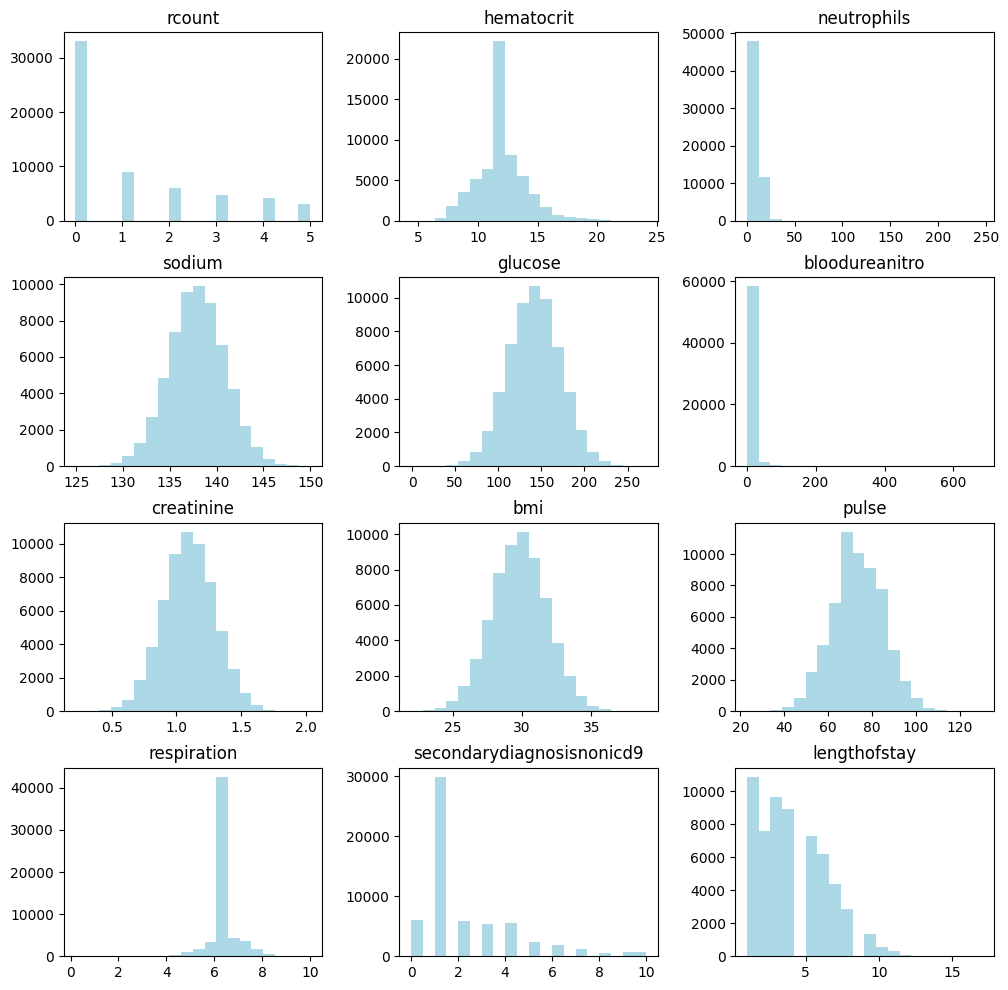

In [ ]:
num_cols = ['rcount','hematocrit','neutrophils','sodium','glucose','bloodureanitro','creatinine','bmi','pulse','respiration','secondarydiagnosisnonicd9','lengthofstay']

import matplotlib.pyplot as plt
train_data[num_cols].hist(bins=20, figsize=(12,12), color='lightblue', grid=False)
plt.show()

### Bar Charts for Categorical Features

Next, we can examine the class columns. Nothing seems irregular here. Most values in `fibrosisandother` seem to be 0, so we can drop it if we want. However, we have enough data, so I will keep it.


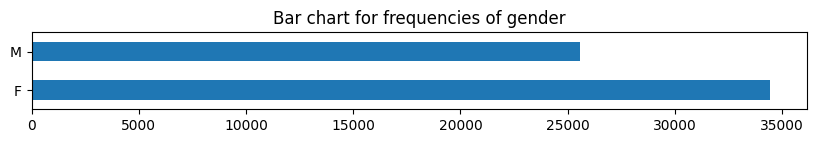

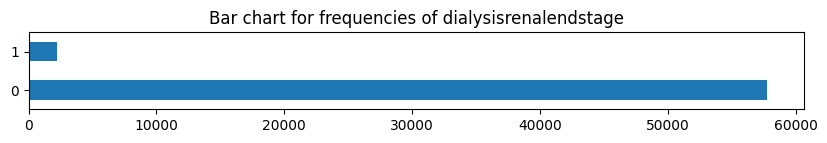

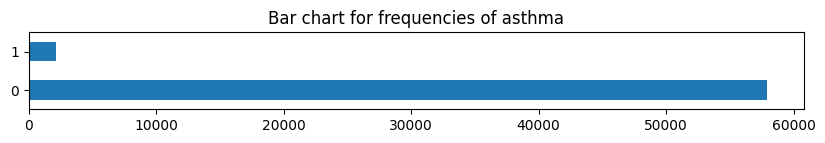

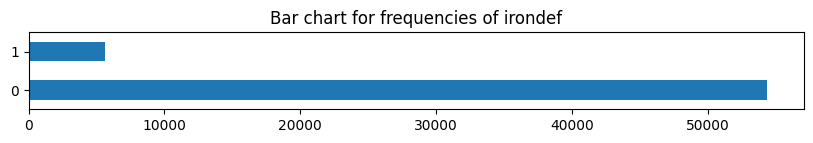

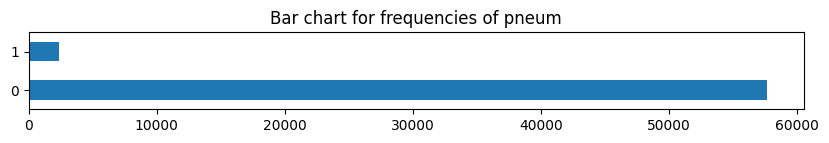

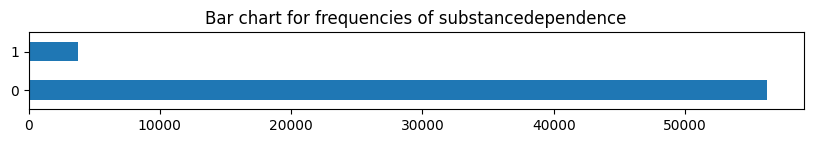

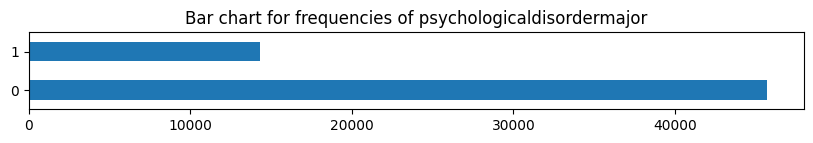

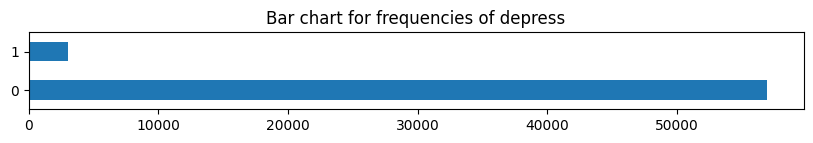

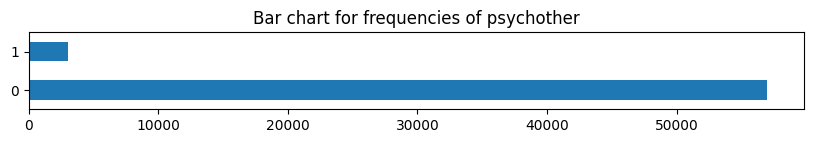

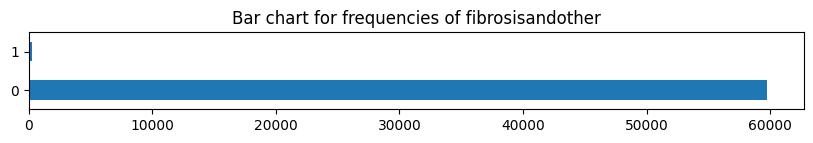

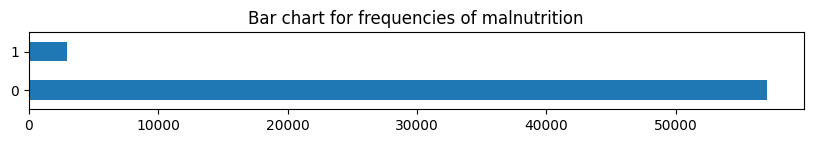

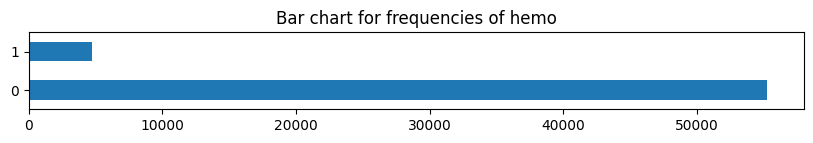

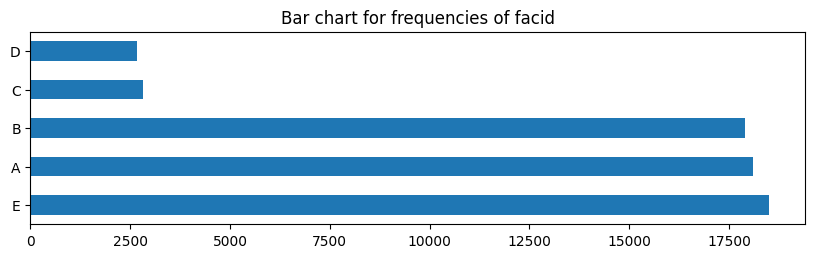

In [ ]:
cat_cols = ['gender','dialysisrenalendstage','asthma','irondef','pneum','substancedependence','psychologicaldisordermajor','depress','psychother','fibrosisandother','malnutrition','hemo','facid']

for col in cat_cols:
    freq_table = train_data[col].value_counts()
    plt.figure(figsize = (10,len(freq_table)*0.5)) #a bit formatting so that chart look better
    freq_table.plot.barh(title='Bar chart for frequencies of ' + col)
    plt.show()
    print()

### Data Pipeline

The next step is to build a pipeline to process our data. Depending on the data, there could be more things to do. The pipeline below provides some preprocessing steps that address the most common issues in tabular data which you can reuse with minimal changes.

We will list the symmetric numeric columns, skewed numeric columns, and categorical columns, since they will be processed differently

In [ ]:
num_cols = ['rcount','hematocrit','sodium','glucose','creatinine','bmi','pulse','respiration','secondarydiagnosisnonicd9']  #this list is for symmetric numeric columns
log_cols = ['neutrophils','bloodureanitro']                                                                                 #this list is for skewed numeric columns
cat_cols = ['gender','dialysisrenalendstage','asthma','irondef','pneum','substancedependence','psychologicaldisordermajor',
            'depress','psychother','fibrosisandother','malnutrition','hemo','facid']                                        #this list for the class columns
target = 'lengthofstay' #this is the name of the target

In [ ]:
#processing pipeline
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

num_pipeline = Pipeline([                           #now we need a small pipeline for numeric columns since it has two steps
    ('impute', SimpleImputer(strategy='median')),   #this step will impute missing values using column medians
    ('standardize', StandardScaler())               #this step will scale all numeric columns
])

def log_transformation(x):
    return np.log(x)

log_pipeline = Pipeline([                                        #now we need a small pipeline for numeric columns since it has two steps
    ('impute', SimpleImputer(strategy='median')),                #this step will impute missing values using column medians
    ('log transform', FunctionTransformer(log_transformation)), #this include a log transformation into the pipeline
    ('standardize', StandardScaler())                            #this step will scale all numeric columns
])

processing_pipeline = ColumnTransformer([                                                      #this transformer merges the processed numeric columns and class columns
    ('numeric', num_pipeline, num_cols),                                                       #numeric columns
    ('log', log_pipeline, log_cols),                                                           #log columns
    ('class', OneHotEncoder(max_categories=5, handle_unknown='infrequent_if_exist'), cat_cols) #encoder to transform class columns to numeric, this will automatically handle missing data
  ])

processing_pipeline.fit(train_data)                            #train the pipeline
trainX = processing_pipeline.transform(train_data)             #generate the training features
trainY = train_data[target]                                    #generate the training target
testX = processing_pipeline.transform(test_data)               #generate the testing features
testY = test_data[target]                                      #generate the testing features

#### Save the processing pipeline

We will save the processing pipeline to use later in the application

In [ ]:
import joblib

joblib.dump(processing_pipeline, '/content/drive/MyDrive/IT7133/Week 3/process_pipeline.pk')

['/content/drive/MyDrive/IT7133/Week 3/process_pipeline.pk']

## Model Training

Now, we will build a Neural Network to learn the function between all inputs and length of stay

In [ ]:
num_layers = 5
num_iters = 50
learning_rate = 0.001

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Input

neural_net = Sequential()
neural_net.add(Input(shape=trainX.shape[1]))
for _ in range(num_layers):
  neural_net.add(Dense(trainX.shape[1], activation='relu'))
neural_net.add(Dense(1))

neural_net.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='mse')
neural_net.fit(trainX, trainY, epochs=num_iters, batch_size=1024, validation_split=0.2)

Epoch 1/50
47/47 [==============================] - 3s 10ms/step - loss: 7.4347 - val_loss: 2.4912
Epoch 2/50
47/47 [==============================] - 1s 12ms/step - loss: 1.4750 - val_loss: 1.0852
Epoch 3/50
47/47 [==============================] - 1s 12ms/step - loss: 0.9839 - val_loss: 0.9383
Epoch 4/50
47/47 [==============================] - 0s 7ms/step - loss: 0.8689 - val_loss: 0.8454
Epoch 5/50
47/47 [==============================] - 0s 6ms/step - loss: 0.8043 - val_loss: 0.7983
Epoch 6/50
47/47 [==============================] - 0s 6ms/step - loss: 0.7672 - val_loss: 0.7686
Epoch 7/50
47/47 [==============================] - 0s 7ms/step - loss: 0.7370 - val_loss: 0.7459
Epoch 8/50
47/47 [==============================] - 0s 6ms/step - loss: 0.7136 - val_loss: 0.7262
Epoch 9/50
47/47 [==============================] - 0s 7ms/step - loss: 0.6904 - val_loss: 0.7102
Epoch 10/50
47/47 [==============================] - 0s 7ms/step - loss: 0.6728 - val_loss: 0.6951
Epoch 11/50
47/4

In [ ]:
neural_net.evaluate(testX, testY)

1250/1250 [==============================] - 2s 2ms/step - loss: 0.5457


0.5456864237785339

You can change the parameters of the neural network and rerun the training several times. When you are happy with the model performance, we will save the model to use in the application.

In [ ]:
neural_net.save('/content/drive/MyDrive/IT7133/Week 3/length_of_stay_NN.keras')